# **ML Assignment 6**
#### Implement **K-Means clustering** and **hierarchical clustering** on the `sales_data_sample.csv` dataset.  

#### Determine the number of clusters using the elbow method.

Dataset link: [sales_data_sample.csv](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data)

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import chardet

# Read a sample of the file in binary mode to check encoding
with open("sales_data_sample.csv", "rb") as f:
    result = chardet.detect(f.read(10000))  # Analyze the first 10,000 bytes

print(result)  # Prints a dictionary with encoding and confidence level

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/sales_data_sample.csv', encoding=result["encoding"])    # Encoding is 'Windows-1252'

print(df.head())
print(df.shape)

# Check for missing values

missing_values = df.columns[df.isnull().any()]

print("Missing Values:\n", missing_values)

df_clean = df.drop(df[missing_values], axis=1)
print(df_clean)

Missing Values:
 ORDERNUMBER         False
QUANTITYORDERED     False
PRICEEACH           False
ORDERLINENUMBER     False
SALES               False
ORDERDATE           False
STATUS              False
QTR_ID              False
MONTH_ID            False
YEAR_ID             False
PRODUCTLINE         False
MSRP                False
PRODUCTCODE         False
CUSTOMERNAME        False
PHONE               False
ADDRESSLINE1        False
ADDRESSLINE2         True
CITY                False
STATE                True
POSTALCODE           True
COUNTRY             False
TERRITORY            True
CONTACTLASTNAME     False
CONTACTFIRSTNAME    False
DEALSIZE            False
dtype: bool


In [ ]:
# Selecting numerical columns for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
df_clustering = df[features]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Standardization of dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_clustering)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

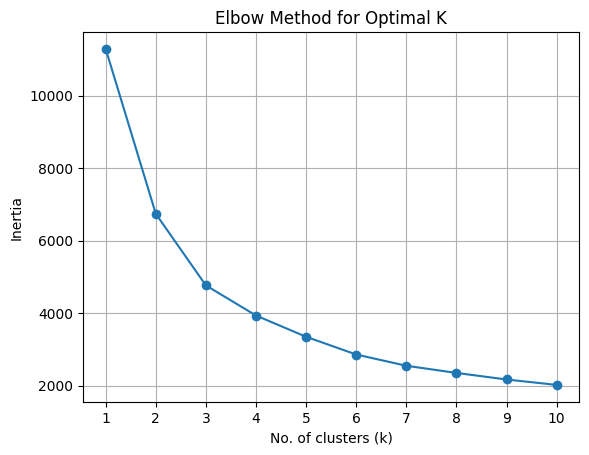

In [ ]:
# Plot for elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("No. of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid()
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)    # new column

# Display the cluster centres in the original feature space
print("Cluster Centers: ", kmeans.cluster_centers_)

Cluster Centers:  [[ 0.88578891 -0.51710013 -0.19223616 -0.61555221]
 [-0.79458628  0.63775953 -0.2150072   0.34884098]
 [ 0.83529732  0.78856567  1.36605722  0.87750675]
 [-0.55318494 -1.36995532 -1.04508639 -0.95333266]]


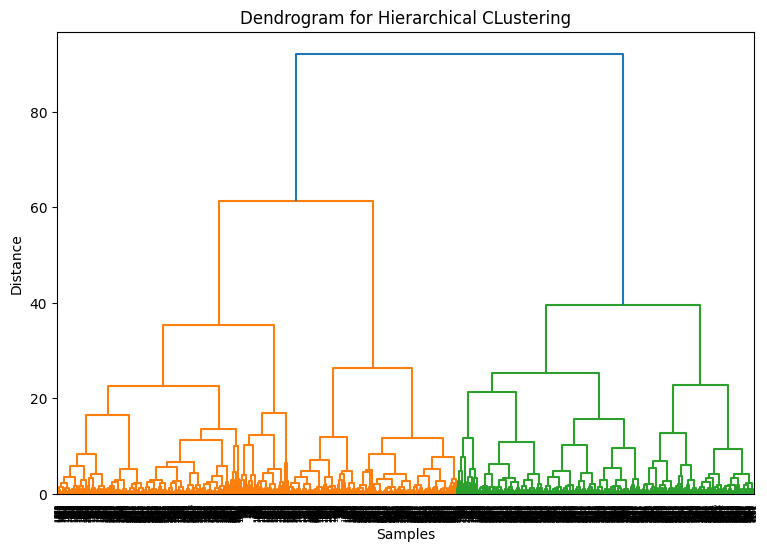

In [ ]:
linked = linkage(x_scaled, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(9, 6))    # 3:2 aspect ratio
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical CLustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()